<a href="https://colab.research.google.com/github/Hemanth9336/basics/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 1.83 ms (started: 2021-03-24 12:16:00 +00:00)


In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from bing_image_downloader import downloader
downloader.download("dog",limit = 30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.barnorama.com/wp-content/uploads/2016/05/07-dog_hooligans.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.funnyalltime.com/wp-content/uploads/2012/09/crazy-roads-in-the-world-12.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.seenox.org/wp-content/uploads/2014/03/Naughty-Dogs-20.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.recreoviral.com/wp-content/uploads/2015/05/animales-con-mutaciones-11-730x548.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.funnyalltime.com/wp-content/uploads/2012/09/crazy-roads-in-the-world-15.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://tranquilmonkey.com/wp-content/uploads/2014/07/funny-underwater-dog-photos-14.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://wallpapershome.com/images/wallpapers/wild-dog-1080x1920-look-eyes-predator-fur-nature-

In [ ]:
from bing_image_downloader import downloader
downloader.download("lion",limit = 30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.10wallpaper.com/wallpaper/1440x900/1310/face_eyes_lion_fur_mane-Animal_HD_Wallpaper_1440x900.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://query.prod.cms.rt.microsoft.com/cms/api/am/binary/RE4DQwv
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/x/lion-wearing-crown-8064789.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://fossilrim.org/wp-content/uploads/2017/01/Our-Animals-Aoudad-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/62/23/3e/62233ef9d5a85cf5a8781474e2e2669f--lion-party-lion-costumes.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.visionsoftravel.org/wp-content/uploads/2019/06/China-Town-Koh-Samui-Thailand-43.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.kittyworks.com/images/fzm7z27kg3n.jpg
[%] File Downloaded !

[%] Downloading 

In [ ]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['dog','lion']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 8.14 s (started: 2021-03-24 12:24:33 +00:00)


In [ ]:
flat_data

array([[0.18235294, 0.18823529, 0.40872549, ..., 0.01960784, 0.1372549 ,
        0.23339869],
       [0.07712418, 0.05751634, 0.08496732, ..., 0.16964706, 0.0904183 ,
        0.06296732],
       [0.10069499, 0.30856427, 0.2238671 , ..., 0.95294118, 0.95294118,
        0.95294118],
       ...,
       [0.46513725, 0.34356863, 0.23376471, ..., 0.55511111, 0.48060131,
        0.42569935],
       [0.37337691, 0.48235294, 0.57275817, ..., 0.3372549 , 0.28648366,
        0.22373856],
       [0.05490196, 0.05490196, 0.05490196, ..., 0.05490196, 0.05490196,
        0.05490196]])

time: 14.9 ms (started: 2021-03-24 12:25:15 +00:00)


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 3.43 ms (started: 2021-03-24 12:26:50 +00:00)


<BarContainer object of 2 artists>

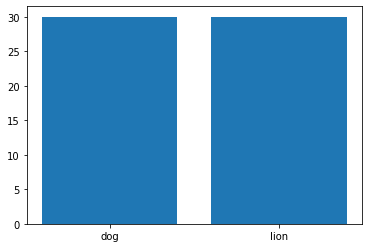

time: 155 ms (started: 2021-03-24 12:29:21 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=102)

time: 22.7 ms (started: 2021-03-24 12:32:06 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 32.6 s (started: 2021-03-24 12:49:31 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

time: 69.6 ms (started: 2021-03-24 12:52:04 +00:00)


In [ ]:
y_test

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

time: 6.8 ms (started: 2021-03-24 12:52:12 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.09 ms (started: 2021-03-24 12:53:00 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

1.0

time: 4.12 ms (started: 2021-03-24 12:53:21 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]])

time: 6.39 ms (started: 2021-03-24 12:54:01 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 22.9 ms (started: 2021-03-24 12:55:29 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 14.3 ms (started: 2021-03-24 12:56:33 +00:00)


Enter your URLhttps://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1.00xw:0.669xh;0,0.190xh&resize=1200:*
(602, 1200, 3)
 PREDICTED OUTPUT: dog


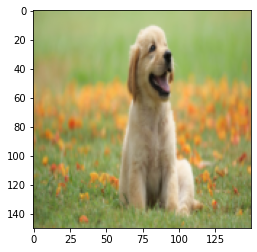

time: 4.13 s (started: 2021-03-24 13:24:21 +00:00)


In [ ]:
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 7.0MB 4.3MB/s 
     |████████████████████████████████| 4.6MB 51.5MB/s 
     |████████████████████████████████| 163kB 49.4MB/s 
     |████████████████████████████████| 112kB 46.6MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 122kB 45.2MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=352957c609109e654bfbb1b4de0100bd059a4477a3a24f469fd1c785d3ae26f5
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 4.4MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.4-cp37-none-any.whl size=18971 sha256=19bb0046cb9341aa2fe02d6aee6548ec15495ab3137153358d7ce5344c337818
  Stored in directory: /root/.cache/pip/wheels/8a/82/b1/cecfba4ff6e2f05777a5a4a65b46c1114842453d5a0e61bdd4
Successfully built pyngrok
time: 19.8 s (started: 2021-03-24 13:26:44 +00:00)


In [59]:
%%writefile app.py 
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image....", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    st.write('Result....')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Overwriting app.py
time: 22 ms (started: 2021-03-24 14:55:25 +00:00)


In [55]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url